# Out of sample LOL embeddings

In [16]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from graspy.plot import pairplot
from lol import LOL
from sklearn.model_selection import StratifiedKFold

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## Define paths
base_dir = Path("/mnt/ssd3/ronan/data/gcca_05-26-10:39_min_rank-ZG3/")
groups, labels = get_latents(base_dir, flag='_gcca')

In [3]:
labels

[['e', 'restingstate'],
 ['e', 'openmonitoring'],
 ['e', 'compassion'],
 ['n', 'restingstate'],
 ['n', 'openmonitoring'],
 ['n', 'compassion']]

In [38]:
# RedBu 6
# colors = [
#     '#b2182b',
#     '#ef8a62',
#     '#fddbc7',
#     '#d1e5f0',
#     '#67a9cf',
#     '#2166ac',
# ]

# PurGr 6
# colors = [
#     '#762a83',
#     '#af8dc3',
#     '#e7d4e8',
#     '#d9f0d3',
#     '#7fbf7b',
#     '#1b7837',
# ]

# PurGr 9
# colors = [
#     '#762a83',
#     '#9970ab',
#     '#c2a5cf',
#     '#a6dba0',
#     '#5aae61',
#     '#1b7837',
# ]

# RedBu 9
colors = [
    '#b2182b',
    '#d6604d',
    '#f4a582',
    '#92c5de',
    '#4393c3',
    '#2166ac',
]

traits = np.concatenate([[l[0]]*len(groups[i]) for i,l in enumerate(labels)])
states = np.concatenate([[l[1]]*len(groups[i]) for i,l in enumerate(labels)])
states_traits = np.concatenate([[l[0] + ' ' + l[1]]*len(groups[i]) for i,l in enumerate(labels)])

In [39]:
X = np.vstack(groups)
X = X.reshape(X.shape[0], -1)
y = np.concatenate([[i]*len(groups[i]) for i in range(len(labels))])
print(X.shape)

(228, 56145)


In [40]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

## states and traits

In [41]:
projs = []
test_idxs = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    lol = LOL(n_components=7, svd_solver='full')
    projs.append(lol.fit(X[train_index], states_traits[train_index]).transform(X[test_index]))
    test_idxs.append(test_index)

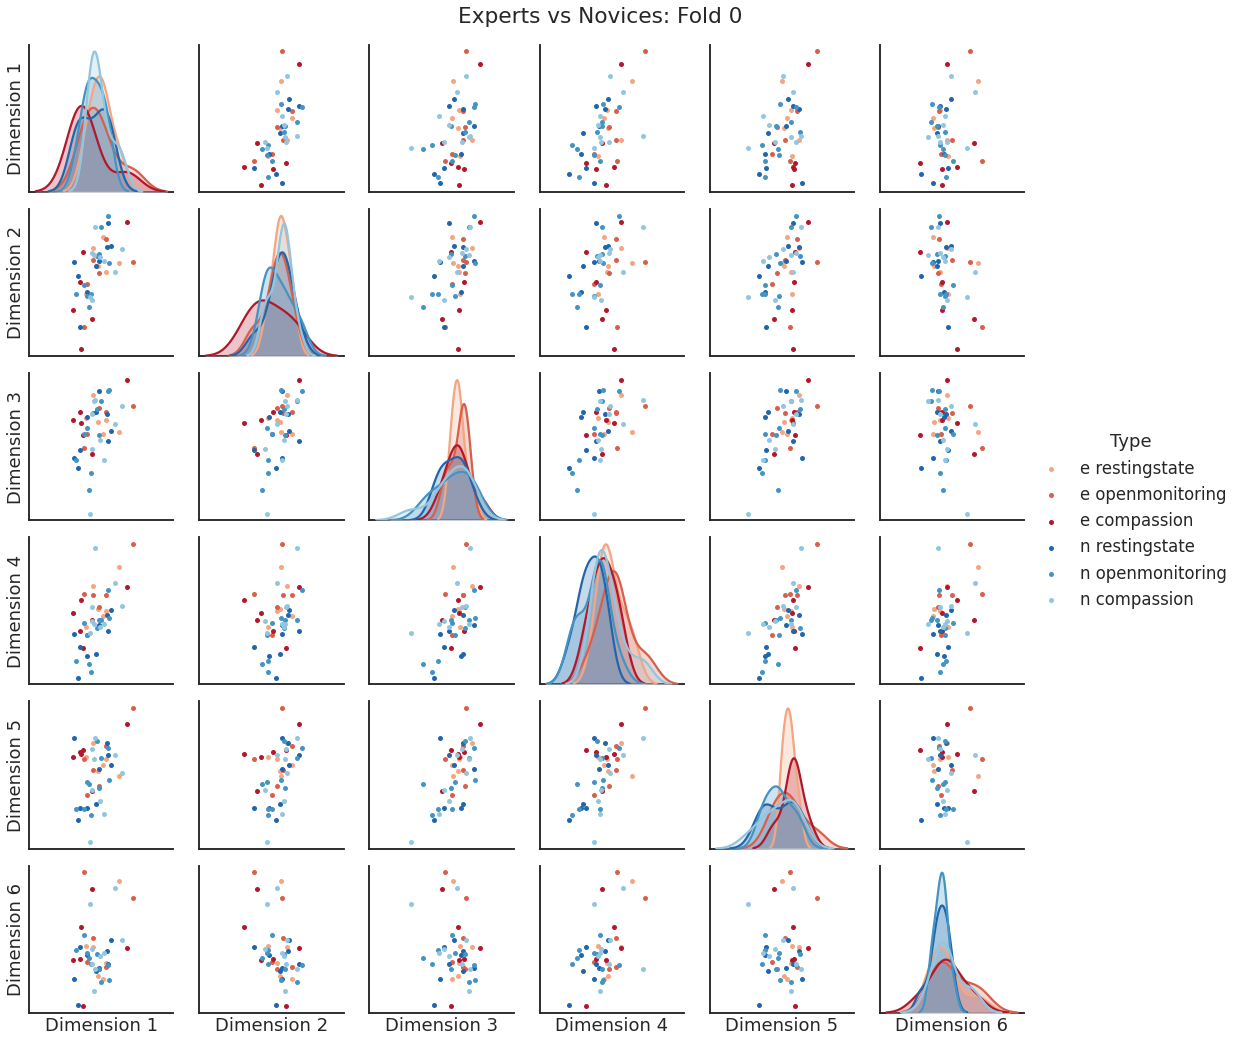

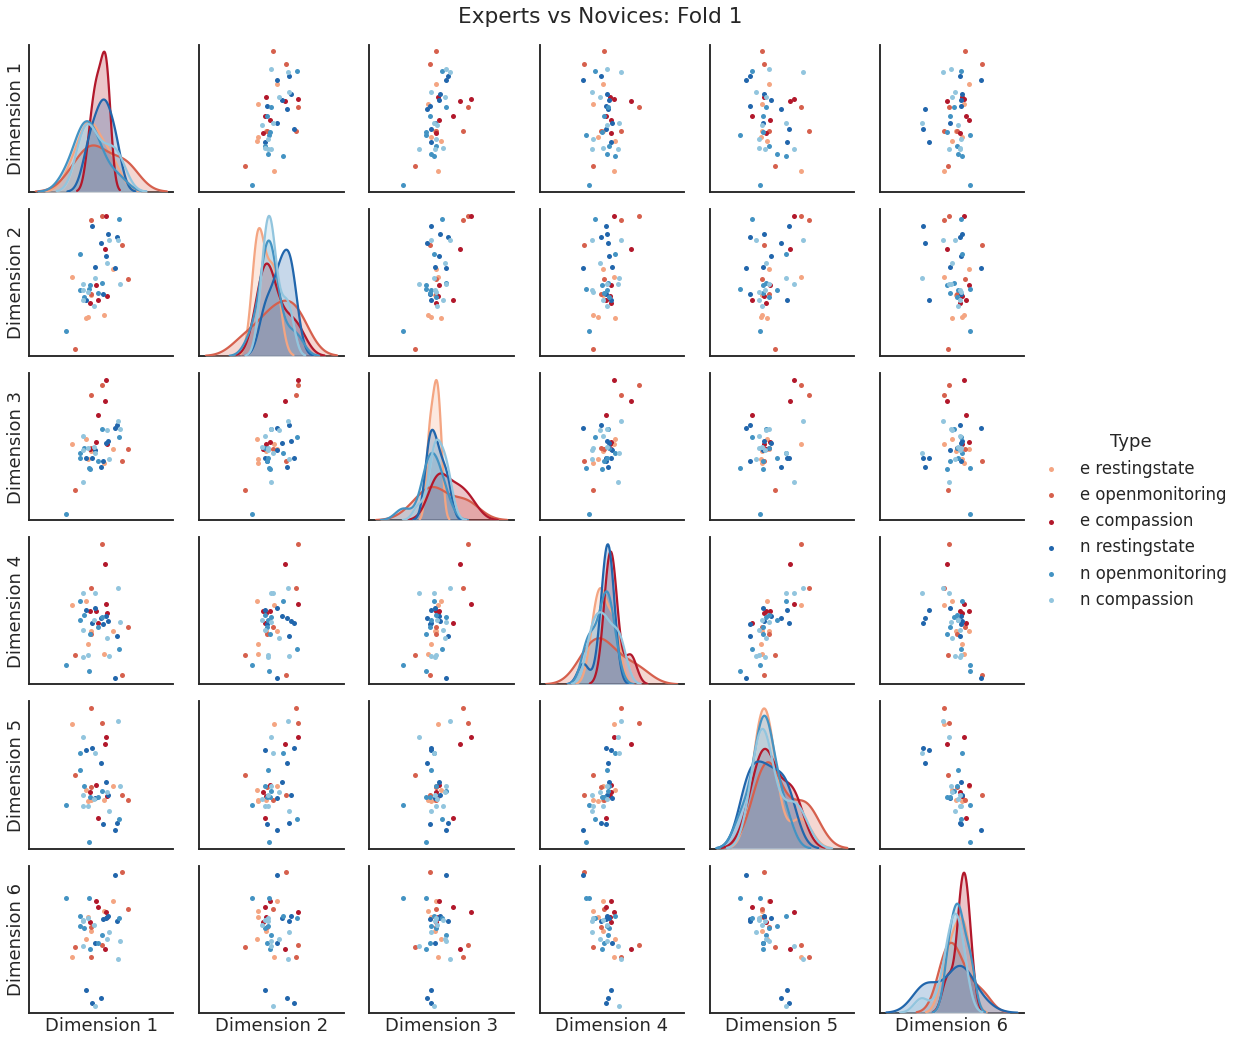

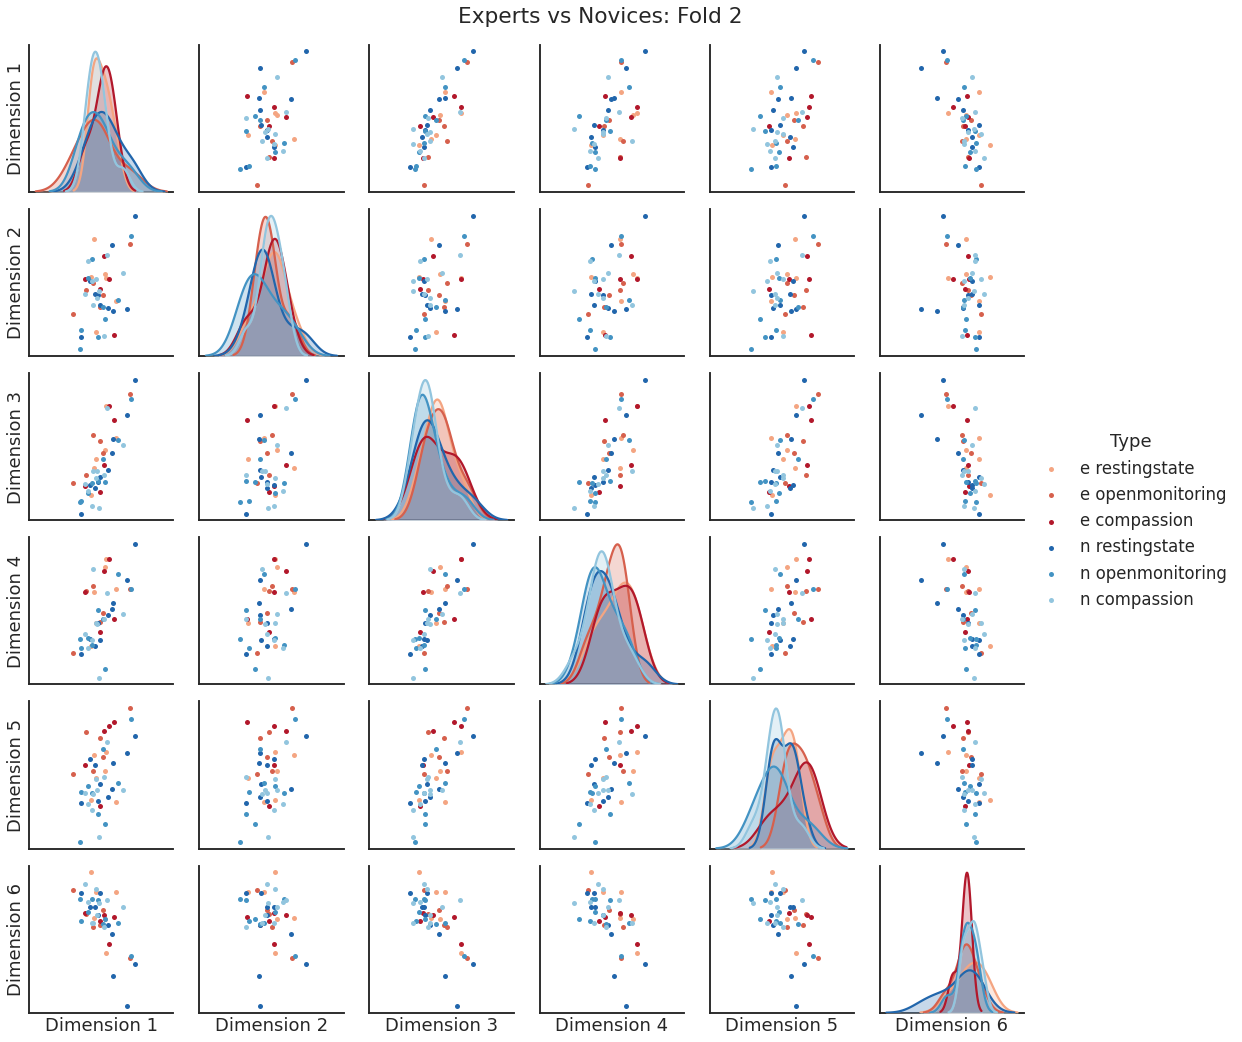

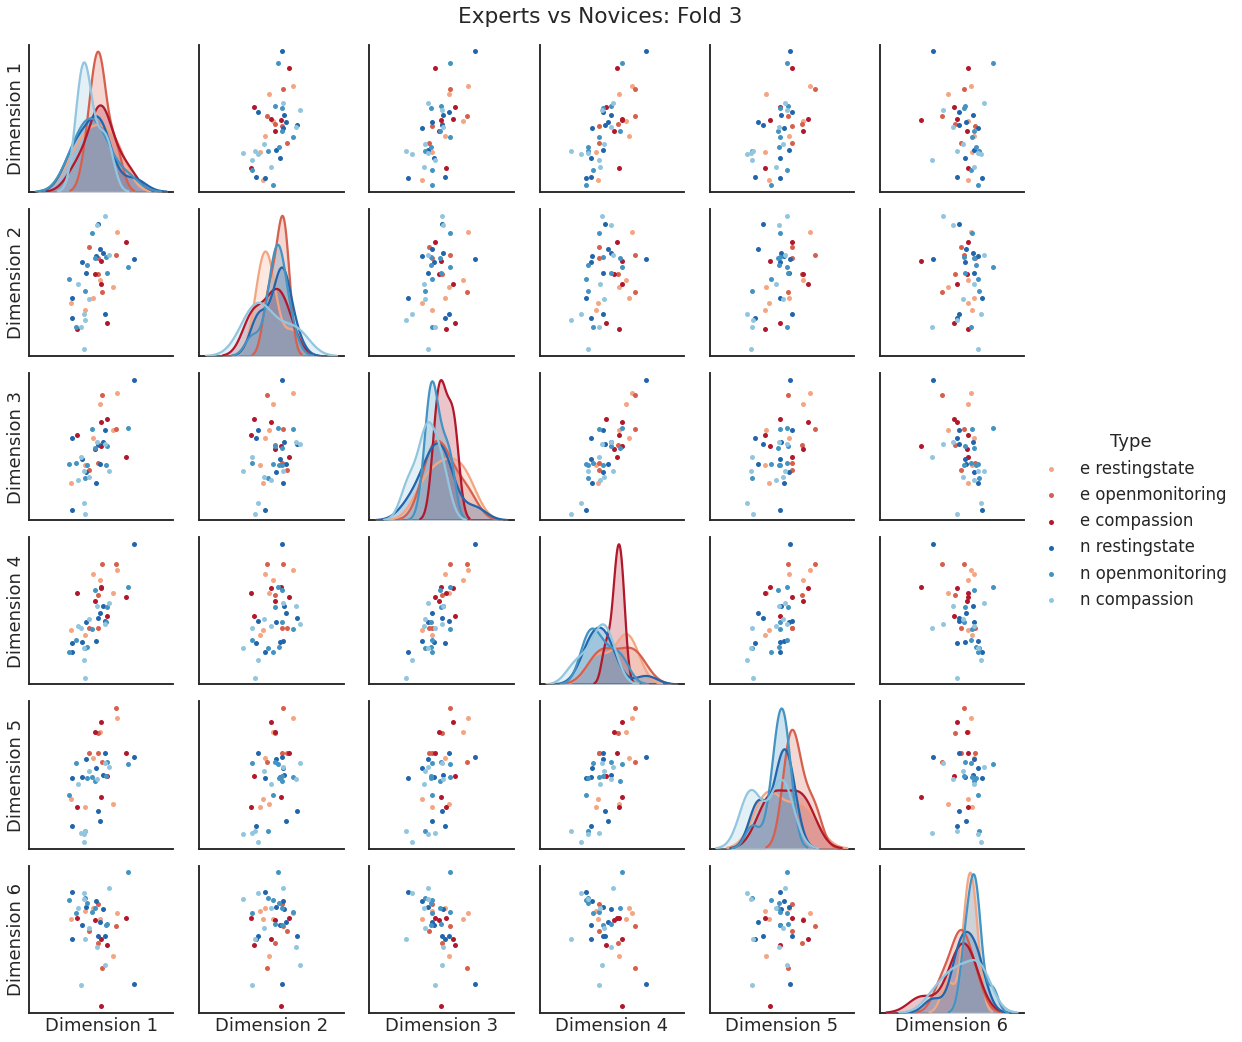

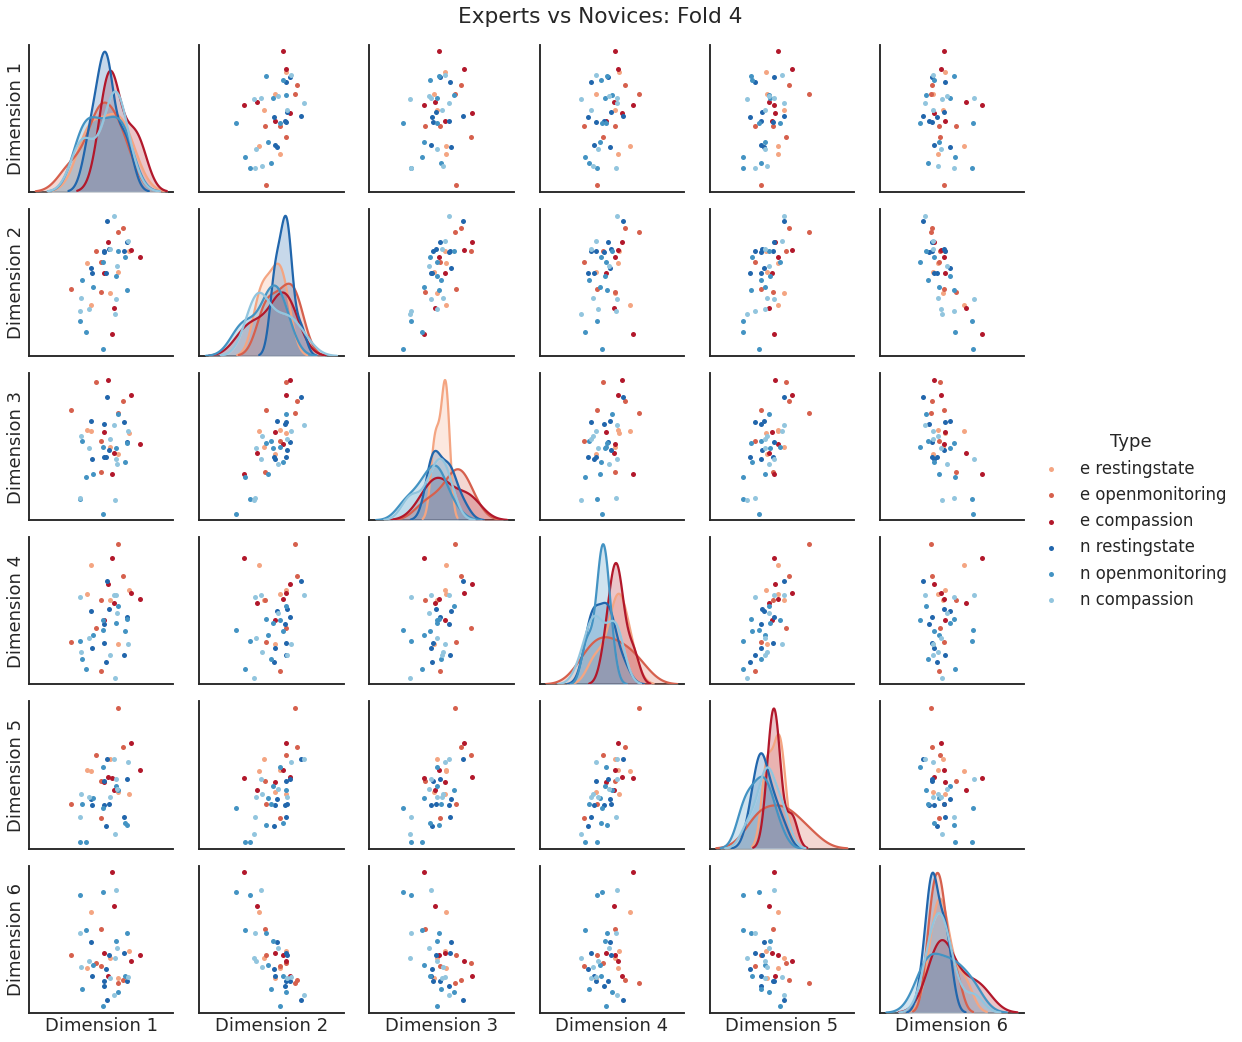

In [42]:
for i,(proj, test_idx) in enumerate(zip(projs, test_idxs)):
    pairplot(
        proj,
        states_traits[test_idx],
        palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
        title=f'Experts vs Novices: Fold {i}',
        alpha=1.0,
        size=100,
    )

## Traits

In [43]:
projs = []
test_idxs = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    lol = LOL(n_components=4, svd_solver='full')
    projs.append(lol.fit(X[train_index], traits[train_index]).transform(X[test_index]))
    test_idxs.append(test_index)

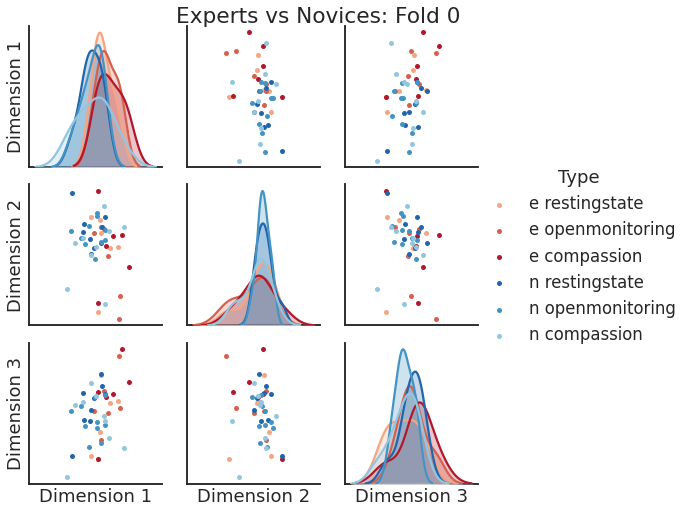

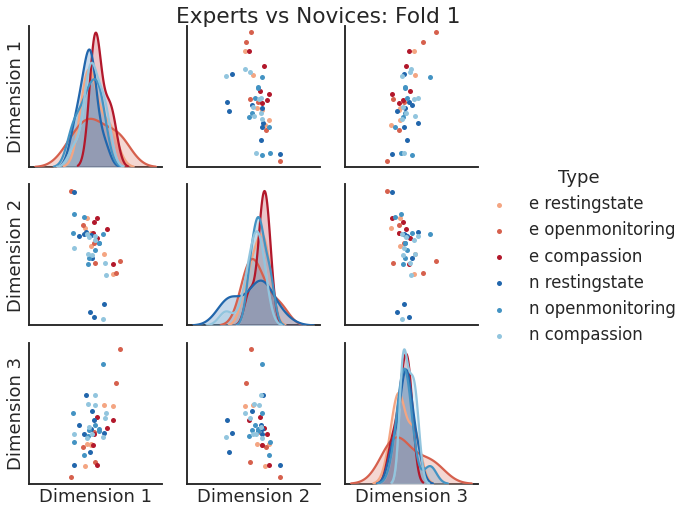

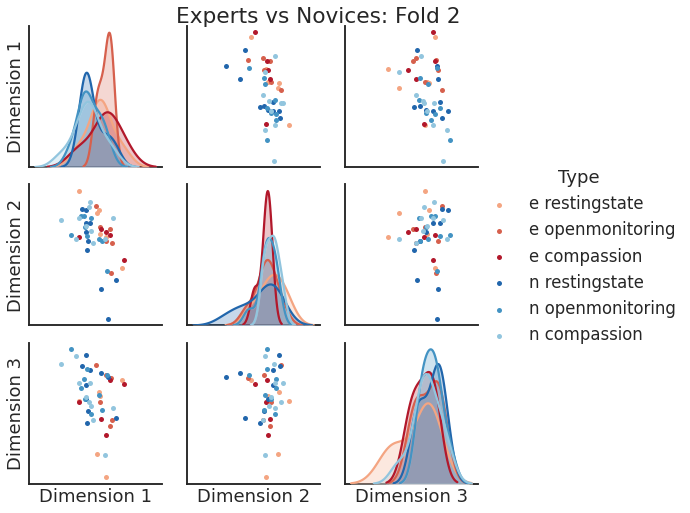

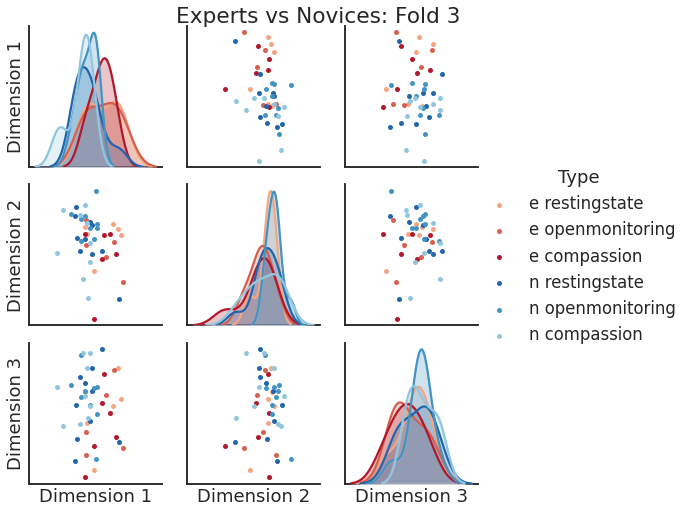

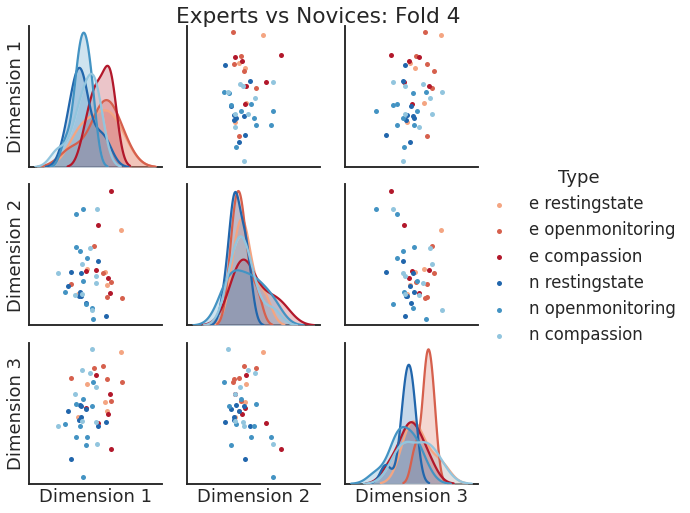

In [44]:
for i,(proj, test_idx) in enumerate(zip(projs, test_idxs)):
    pairplot(
        proj,
        states_traits[test_idx],
        palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
        title=f'Experts vs Novices: Fold {i}',
        alpha=1.0,
        size=100,
    )

## States

In [45]:
projs = []
test_idxs = []

for i,(train_index, test_index) in enumerate(skf.split(X, y)):
    lol = LOL(n_components=3, svd_solver='full')
    projs.append(lol.fit(X[train_index], states[train_index]).transform(X[test_index]))
    test_idxs.append(test_index)

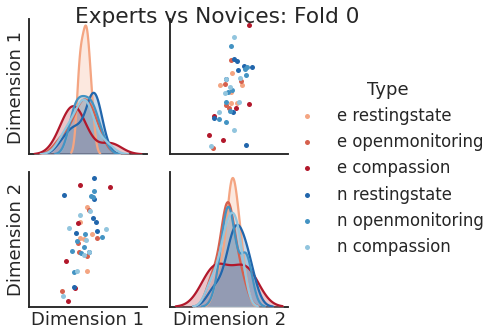

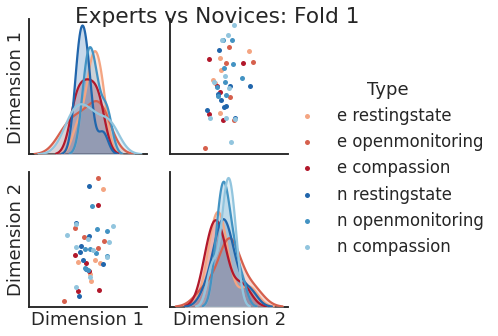

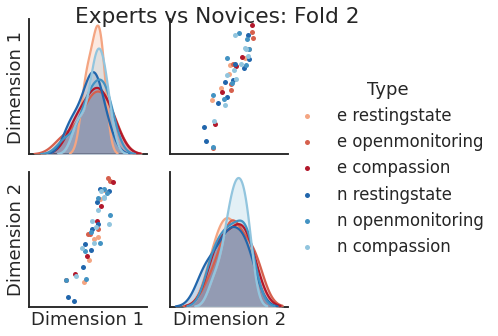

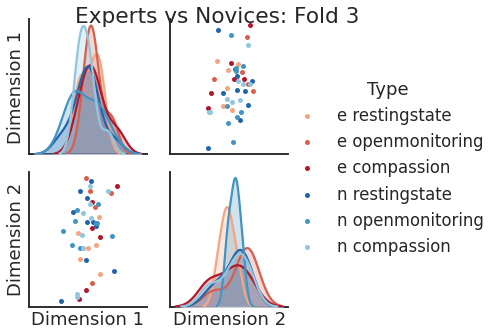

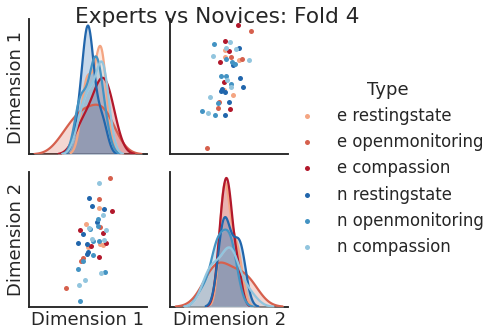

In [47]:
for i,(proj, test_idx) in enumerate(zip(projs, test_idxs)):
    pairplot(
        proj,
        states_traits[test_idx],
        palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
        title=f'Experts vs Novices: Fold {i}',
        alpha=1.0,
        size=100,
    )

## State agnostic

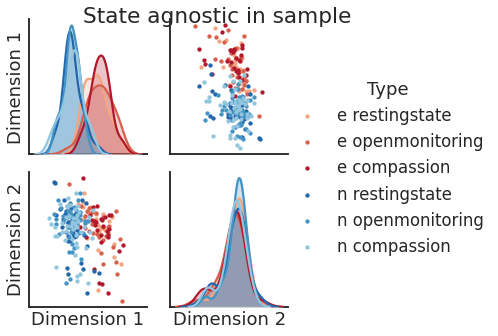

In [49]:
lol = LOL(n_components=3, svd_solver='full')
proj = lol.fit_transform(X, traits)

pairplot(
    proj,
    states_traits,
    palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
    title=f'State agnostic in sample',
    alpha=1.0,
    size=75,
    )

## Trait Agnostic

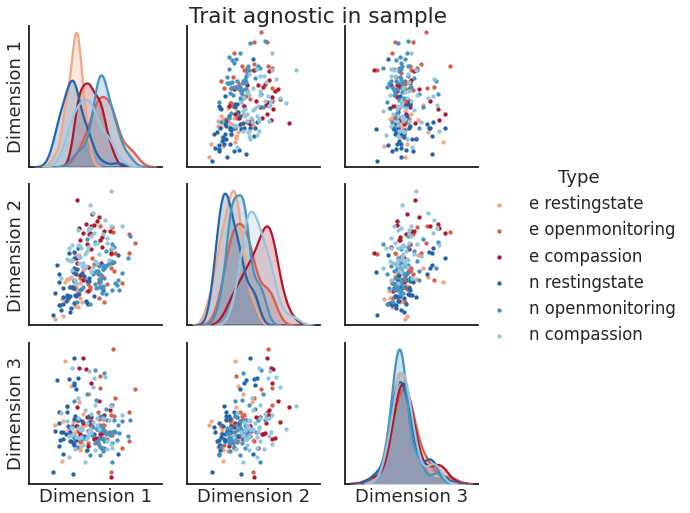

In [51]:
lol = LOL(n_components=4, svd_solver='full')
proj = lol.fit_transform(X, states)

pairplot(
    proj,
    states_traits,
    palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
    title=f'Trait agnostic in sample',
    alpha=1.0,
    size=75,
    )

## In sample state,traits

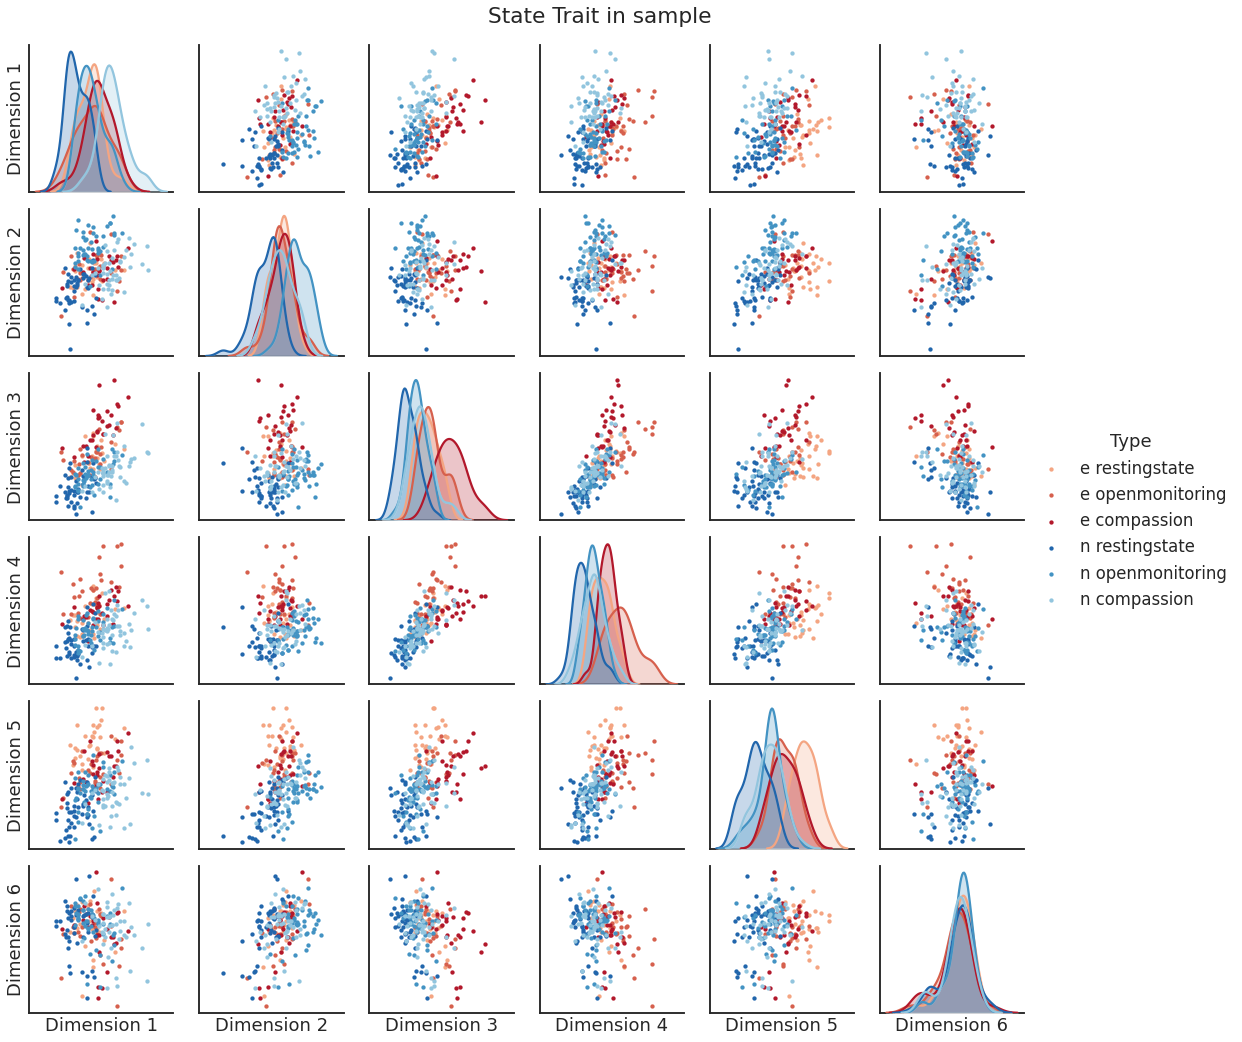

In [52]:
lol = LOL(n_components=7, svd_solver='full')
proj = lol.fit_transform(X, states_traits)

pairplot(
    proj,
    states_traits,
    palette = {name:col for name,col in zip(np.unique(states_traits), colors)},
    title=f'State Trait in sample',
    alpha=1.0,
    size=75,
    )